# Recreation of the album cover: Joy Division - Unknown pleasures

[original cover](https://upload.wikimedia.org/wikipedia/en/5/5a/UnknownPleasuresVinyl.jpg)

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data

The data was originally shared by the Github user [Borgar](https://github.com/borgar): [data](https://gist.githubusercontent.com/borgar/31c1e476b8e92a11d7e9/raw/0fae97dab6830ecee185a63c1cee0008f6778ff6/pulsar.csv)

In [2]:
data = pd.read_csv(
    "../data/pulsars.csv",
    header=None
)
data.shape

(80, 300)

I've transposed the data so **one column = one line** on the plot. This is purely for convenience as I prefer to work with columns rather than rows.  
There's 80 lines in total.

In [3]:
data = data.T
data.shape

(300, 80)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.81,-0.61,-1.43,-1.09,-1.13,-0.66,-0.36,-0.73,-0.89,-0.69,...,0.00,-0.16,0.19,-0.32,-0.16,0.62,0.32,-0.09,0.11,0.12
1,-0.91,-0.40,-1.15,-0.85,-0.98,-0.89,-0.21,-0.83,-0.61,-0.54,...,-0.12,-0.15,0.06,-0.83,-0.26,0.64,0.31,-0.14,0.05,-0.12
2,-1.09,-0.42,-1.25,-0.72,-0.93,-0.87,-0.44,-0.91,-0.74,-0.84,...,0.10,0.25,-0.27,-0.69,-0.36,0.59,0.28,-0.24,0.05,-0.12
3,-1.00,-0.38,-1.13,-0.74,-0.90,-0.87,-0.20,-1.10,-0.85,-0.89,...,-0.01,0.37,-0.11,-0.80,-0.49,0.30,0.42,-0.24,-0.05,-0.45
4,-0.59,-0.55,-0.76,-0.26,-1.14,-1.07,-0.31,-0.87,-0.77,-0.45,...,-0.15,-0.13,0.09,-0.76,0.00,0.01,-0.24,-0.66,-0.03,-0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.26,-0.83,0.11,-1.03,-0.29,-0.55,-1.45,-1.20,-0.94,-0.16,...,0.47,0.10,-0.06,0.08,0.28,-0.21,-0.56,-0.12,-0.87,0.13
296,-0.52,-0.80,-0.77,-0.78,-0.54,-0.62,-0.77,-1.40,-1.05,0.24,...,0.41,0.02,-0.08,-0.15,-0.01,-0.09,-0.50,0.29,-1.31,0.09
297,-0.44,-0.47,-0.88,-0.40,-0.65,-0.71,0.03,-0.51,-0.51,-0.17,...,0.32,-0.10,-0.04,0.03,-0.67,-0.24,-0.38,-0.02,-1.02,-0.01
298,-0.58,-0.13,-0.45,0.18,-0.64,-0.88,0.47,0.25,-0.47,-0.09,...,0.57,-0.16,0.23,0.03,-0.86,-0.17,-0.58,0.21,-1.10,-0.03


In [5]:
# The original frequency of a pulse was 1.337s
t = data.index.values*1.337

## Plot - as script

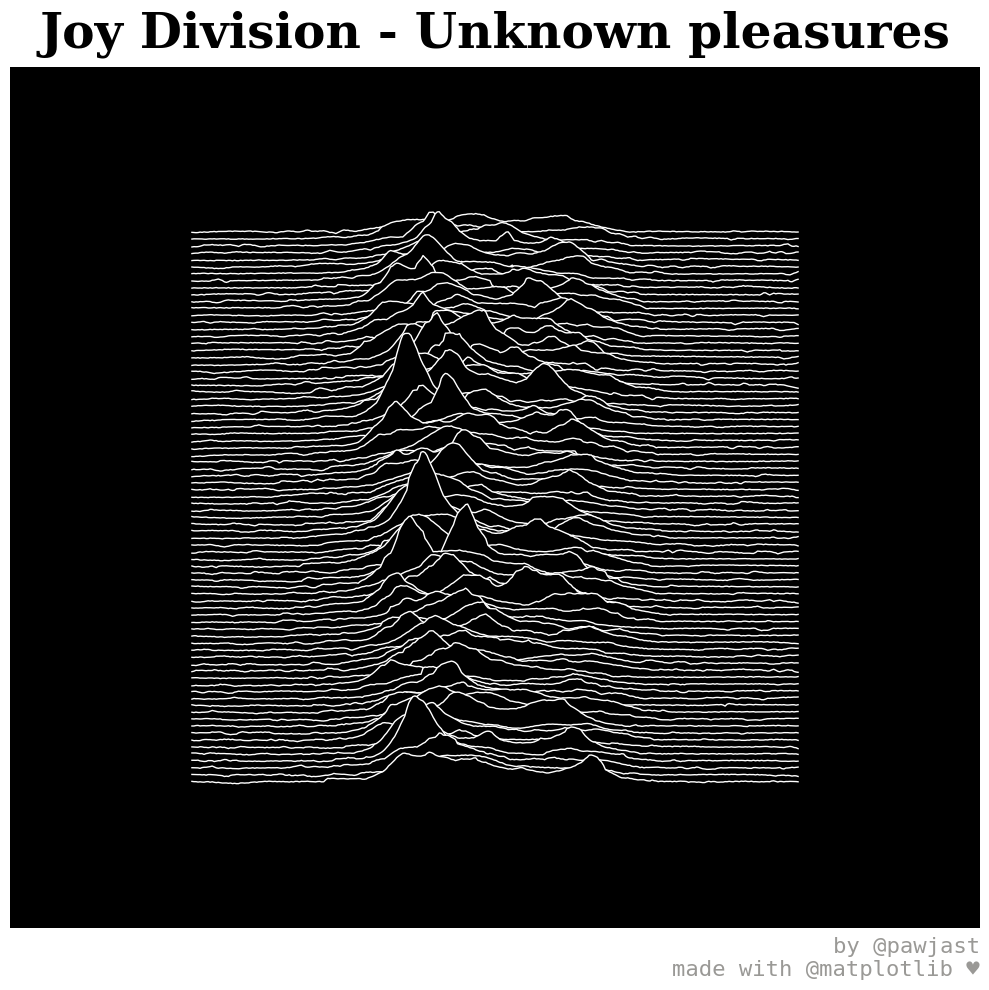

In [6]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    facecolor="white"
)

fig.suptitle(
    "Joy Division - Unknown pleasures",
    fontsize=35,
    fontfamily="serif",
    weight="bold"
)

# Since column headers are `int` type I re-used them to
# - space the lines out
# - set the `z-order` of the lines & fills
for col in data:
    y_val = data[col]-col*6
    ax.fill_between(
        x=t,
        y1=min(y_val),
        y2=y_val,
        facecolor="black",
        zorder=col
    )
    ax.plot(
        t, y_val,
        color="white",
        linewidth=1,
        zorder=col
    )

ax.set_facecolor("black")

# Set axis limits
offset_val = 100
ax.set_xlim(
    ax.get_xlim()[0] - offset_val,
    ax.get_xlim()[1] + offset_val,
)
ax.set_ylim(
    ax.get_ylim()[0] - offset_val,
    ax.get_ylim()[1] + offset_val,
)

# Remove `y` axis ticks and tick labels
ax.tick_params(
    axis="both",
    which="major",
    left=False,
    labelleft=False,
    bottom=False,
    labelbottom=False
)

# Remove spines
for position in ["top", "right", "bottom", "left"]:
    ax.spines[position].set_visible(False)

# Footer
ax.text(
    1, -0.06,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

plt.tight_layout()

# plt.savefig(
#     fname="1.png",
#     format="png",
#     dpi=125,
# );

## Plot - as a function

### Function definition

In [7]:
def plot_joy(ax=None, data=None, line_col="white", bg_col="black"):
    """ABC
    """
    if ax is None:
        fig = plt.Figure()
        ax = fig.add_subplot()

    # Since column headers are `int` type I re-used them to
    # - space the lines out
    # - set the `z-order` of the lines & fills
    for col in data:
        y_val = data[col]-col*6
        ax.fill_between(
            x=t,
            y1=min(y_val),
            y2=y_val,
            facecolor=bg_col,
            zorder=col
        )
        ax.plot(
            t, y_val,
            color=line_col,
            linewidth=1,
            zorder=col
        )

    ax.set_facecolor(bg_col)

    # Set axis limits
    offset_val = 100
    ax.set_xlim(
        ax.get_xlim()[0] - offset_val,
        ax.get_xlim()[1] + offset_val,
    )
    ax.set_ylim(
        ax.get_ylim()[0] - offset_val,
        ax.get_ylim()[1] + offset_val,
    )

    # Remove `y` axis ticks and tick labels
    ax.tick_params(
        axis="both",
        which="major",
        left=False,
        labelleft=False,
        bottom=False,
        labelbottom=False
    )

    # Remove spines
    for position in ["top", "right", "bottom", "left"]:
        ax.spines[position].set_visible(False)

    return ax

### Plot black & white

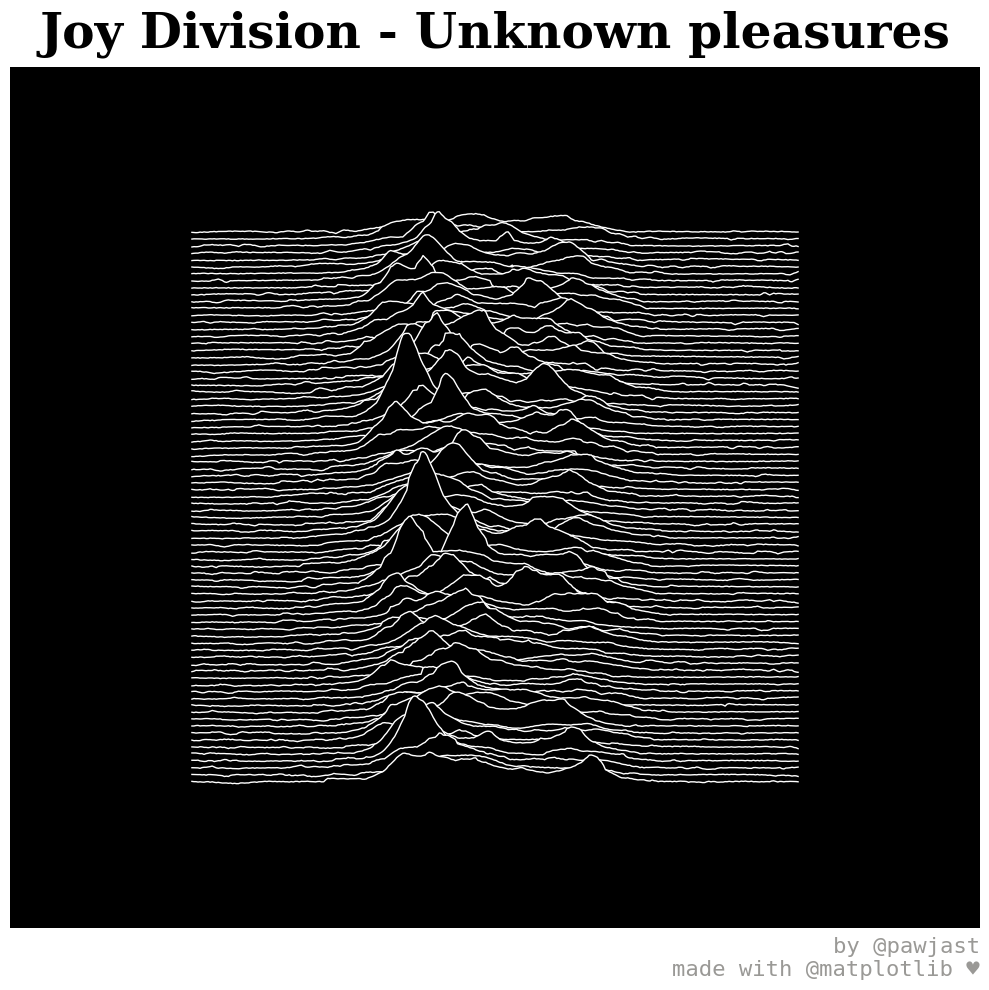

In [8]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    facecolor="white"
)

fig.suptitle(
    "Joy Division - Unknown pleasures",
    fontsize=35,
    fontfamily="serif",
    weight="bold"
)

plot_joy(ax, data)

# Footer
ax.text(
    1, -0.06,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

plt.tight_layout()

# plt.savefig(
#     fname="2.png",
#     format="png",
#     dpi=125
# );


### Plot white & black

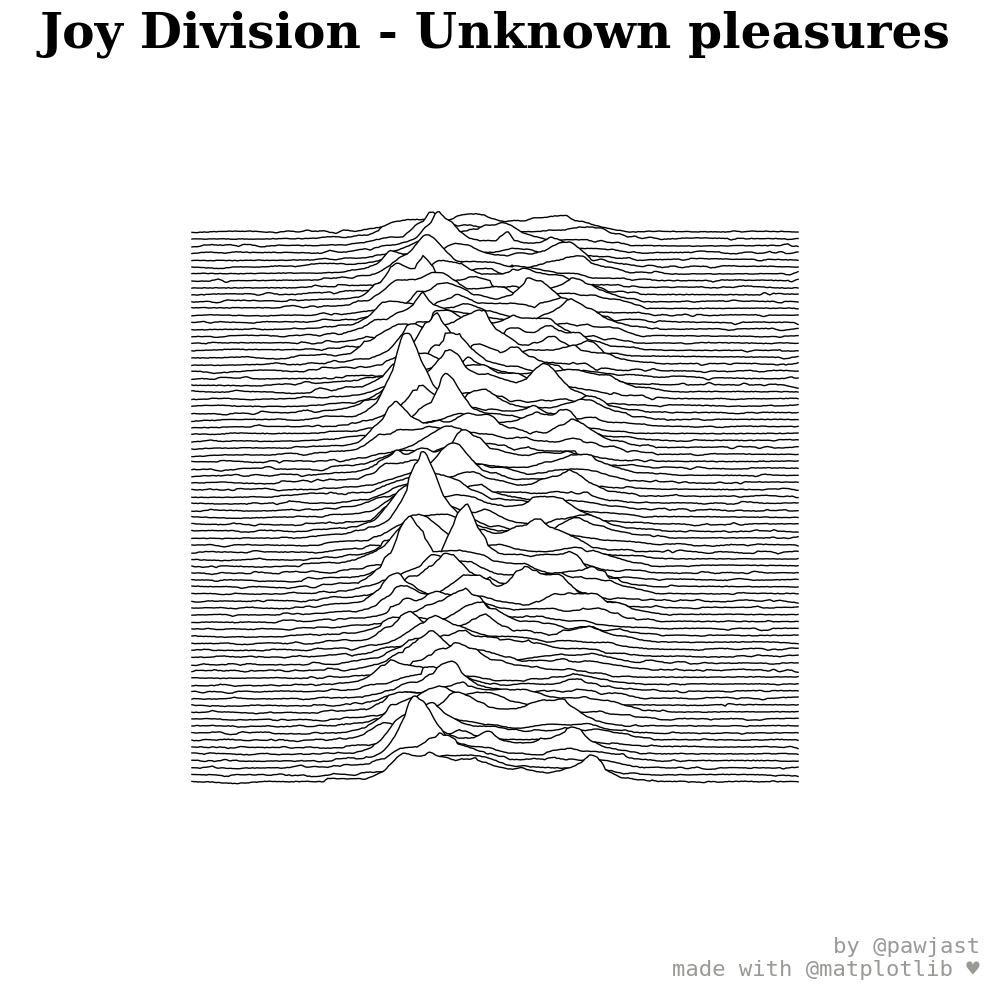

In [9]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    facecolor="white"
)

fig.suptitle(
    "Joy Division - Unknown pleasures",
    fontsize=35,
    fontfamily="serif",
    weight="bold"
)

plot_joy(ax, data, "black", "white")

# Footer
ax.text(
    1, -0.06,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

plt.tight_layout()

# plt.savefig(
#     fname="3.png",
#     format="png",
#     dpi=125
# );


### Plot grid

I used colours from Queen's *Hot Space* album.

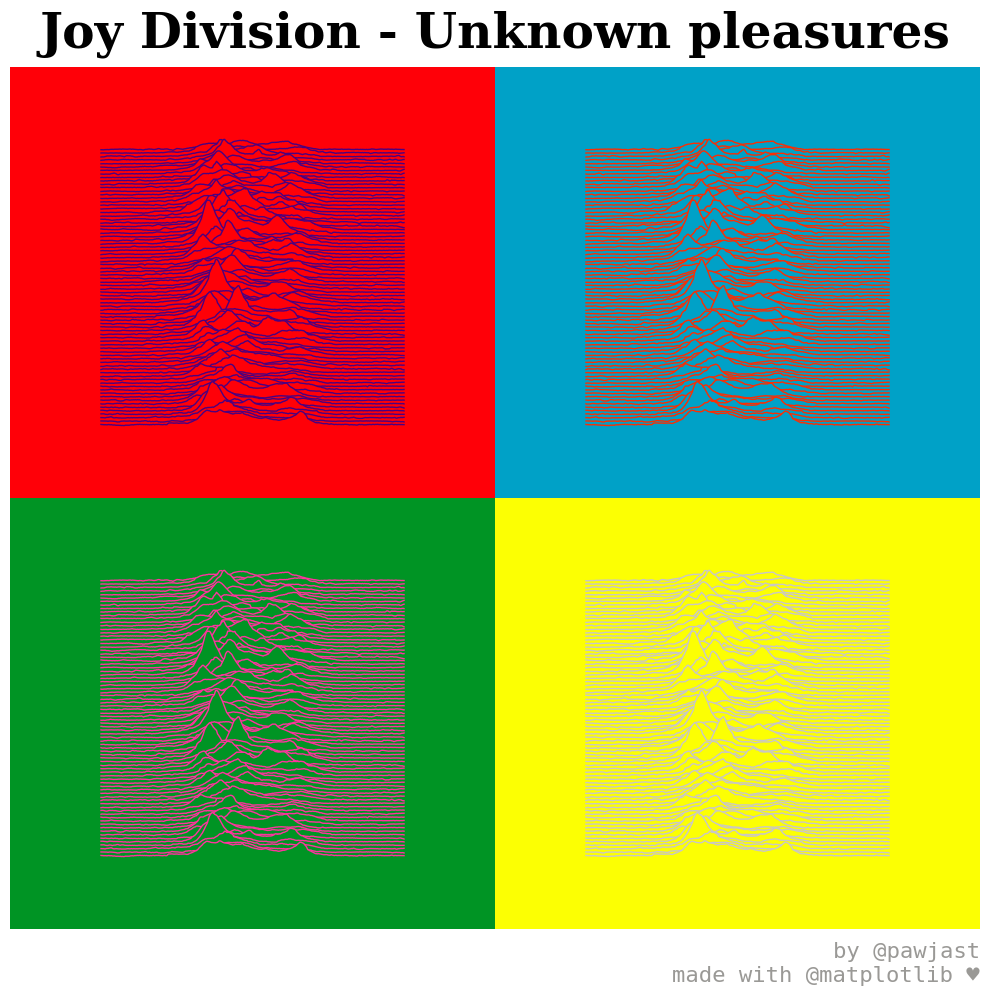

In [10]:
bg_colors = [
    (1.00, 0.00, 0.03),  # red
    (0.00, 0.63, 0.78),  # blue
    (0, 0.58, 0.14),  # green
    (0.99, 1.00, 0.01),  # yellow
]

line_colors = [
    (0.29, 0.00, 0.50),  # purple
    (0.98, 0.18, 0.01),  # red
    (1.00, 0.20, 0.62),  # pink
    (0.79, 0.78, 0.78),  # grey
]

fig, axs = plt.subplots(
    2, 2,
    figsize=(10, 10),
    facecolor="white"
)

fig.suptitle(
    "Joy Division - Unknown pleasures",
    fontsize=35,
    fontfamily="serif",
    weight="bold"
)

for ax, line_col, bg_col in zip(axs.flat, line_colors, bg_colors):
    plot_joy(ax, data, line_col, bg_col)


# Footer
axs.flat[-1].text(
    1, -0.13,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

# plt.savefig(
#     fname="4.png",
#     format="png",
#     dpi=125
# );